In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation



### Load Data 

In [131]:
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [132]:
X = df.iloc[:, [0, 1, 2, 3]].values
X=X.astype(float)
X=np.array(X)

### PCA IMPLEMENTATION FROM SCRATCH

In [133]:
def _PCA(X, n_components=2):
    if n_components > X.shape[1]:
        raise ValueError("n_components cannot be greater than the number of features")

    # 1. Standardize data by subtracting mean and dividing by standard deviation
    mean_values = X.mean(axis=0)
    std_values = X.std(axis=0)
    X_standardized = (X - mean_values) / std_values

    # 2. Covariance matrix From Scratch
    cov = np.dot(X_standardized.T, X_standardized) / (X_standardized.shape[0])  # (n_features, n_features)

    # 3. Eigen decomposition
    eigen_values, eigen_vectors = np.linalg.eig(cov)

    # 4. Sort eigen values in descending order
    idx = eigen_values.argsort()[::-1]
    eigen_values = eigen_values[idx]
    eigen_vectors = eigen_vectors[:, idx]

    # 5. Select top n_components
    eigen_vectors = eigen_vectors[:, :n_components]

    # 6. Project original data
    X_pca = np.dot(X_standardized, eigen_vectors)

    # 7. Inverse transform to get reconstructed data
    X_reconstructed = np.dot(X_pca, eigen_vectors.T) * std_values + mean_values

    return eigen_values, eigen_vectors, X_pca, X_reconstructed


In [134]:
def loss (X, X_reconstructed):
    return (np.sum(abs(X - X_reconstructed))/X.shape[0])

In [135]:
lossList=[]
for _ in range(1,X.shape[1]+1):
    eigen_values, eigen_vectors, X_pca, X_reconstructed = _PCA(X, n_components=_)
    lossList.append(loss(X,X_reconstructed).round(3))
    print("Loss for ",_, "components: ",loss(X,X_reconstructed).round(3))

Loss for  1 components:  0.936
Loss for  2 components:  0.544
Loss for  3 components:  0.227
Loss for  4 components:  0.0


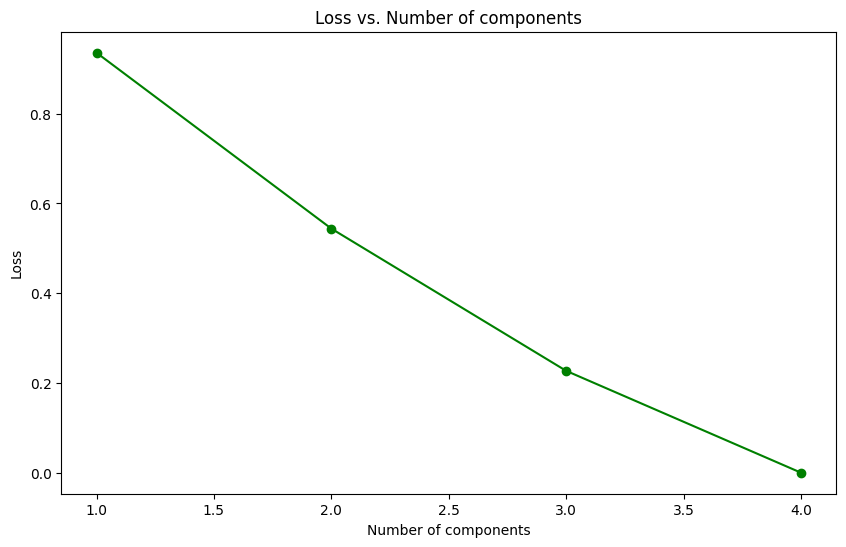

In [136]:
# Plotting the Loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, X.shape[1]+1), lossList, marker='o', color='green')
plt.xlabel('Number of components')
plt.ylabel('Loss')
plt.title('Loss vs. Number of components')
plt.show()

### We choose the number of components to be 2 for the sake of visualization of the data

In [137]:
eigen_values, eigen_vectors, X_pca, X_reconstructed = _PCA(X, n_components=3)

C:\Users\ziadw\AppData\Local\Temp\ipykernel_17776\3201026772.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_pca[:, 0], X_pca[:, 1], c="green", cmap='viridis')


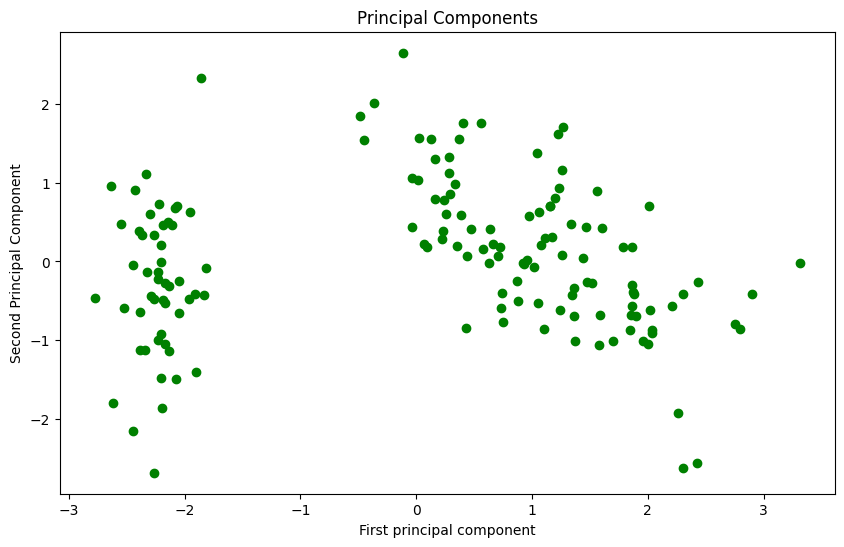

In [138]:
# Plotting the X_pca 
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c="green", cmap='viridis')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.title('Principal Components')
plt.show()